First cell is to import all the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Second cell is to define all the functions in this libraries.
    All the functions in this library are determined to be used with Dataframe type of data.

In [36]:
def basichist(dataframe,xvar,bin=20,pdf=False):
    plt.hist(dataframe[xvar],bins=bin,density=True);
    if pdf == True:
        dum_df = dataframe[xvar].sort_values()
        dum_std = dum_df.std()
        dum_mean = dum_df.mean()
        y = [(np.exp(-0.5*(((i-dum_mean)/dum_std)**2)))/(dum_std*np.sqrt(2*np.pi)) for i in dum_df]
        plt.plot(dum_df,y,label='Normal approximation')
        plt.legend(loc='upper right')
def basicscatter(dataframe,xvar,yvar,ols=False):
    dum_df = dataframe[[xvar,yvar]]
    dum_df = dum_df.dropna()
    plt.scatter(dum_df[xvar],dum_df[yvar]);
    if ols == True:
        olsline = stats.linregress(dum_df[xvar],dum_df[yvar])
        plt.plot(dum_df[xvar],olsline.intercept + olsline.slope*dum_df[xvar],label = 'R-Square is {:.4f} Slope is {:.4f}'.format(olsline.rvalue**2,olsline.slope),color='red',);
        plt.legend(loc='upper right');
def compareboxplot(dataframe,xvar,yvar):
    dum_df = dataframe[[xvar,yvar]]
    dum_df = dum_df.dropna()
    fig, axs = plt.subplots()
    list_xvar = list(set([i for i in dum_df[xvar]]))
    list_plot = []
    for i in list_xvar:
        list_plot.append(dum_df[dum_df[xvar]==i][yvar])
    axs.boxplot(list_plot);
def tabulatebarplot(dataframe,xvar,yvar):
    confine = dataframe[[xvar,yvar]]
    confine = confine.dropna()
    list_xvar = list(set([i for i in confine[xvar]]))
    list_yvar = list(set([i for i in confine[yvar]]))
    y_count = [[] for i in range(len(list_yvar))]
    y_dict = {}
    for i,k in enumerate(list_yvar):
        dum_y = confine[confine[yvar]==k]
        for j in list_xvar:
            y_count[i].append(len(dum_y[dum_y[xvar]==j]))
        y_dict[k] = y_count[i]
    bottom = np.zeros(len(list_xvar))
    for a,b in y_dict.items():
        p = plt.bar([i for i in list_xvar],b, label=a, bottom = bottom)
        bottom += b
        plt.bar_label(p, label_type='center')
        plt.legend()
def matrixtabplot(dataframe,xvar,yvar):
    confine = dataframe[[xvar,yvar]]
    confine = confine.dropna()
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(121, projection='3d')
    list_xvar = list(set([i for i in confine[xvar]]))
    list_yvar = list(set([i for i in confine[yvar]]))
    _x = [i*2 for i in range(len(list_xvar))]
    _y = [i*2 for i in range(len(list_yvar))]
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()
    top = []
    for i in list_yvar:
        dum_y = confine[confine[yvar]==i]
        for j in list_xvar:
            top.append(len(dum_y[dum_y[xvar]==j]))
    bottom = np.zeros_like(top)
    width = depth = 1
    ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
    ax1.set_title('Count')
    plt.show()

Third cell is to read focused dataframe.

In [4]:
df_titanic = pd.read_csv('titanic_dataset.csv')

In [35]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Syntax of "basichist" is basichist(name of the dataframe, interested variable in the dataframe's column, number of bins, pdf = True to show estimated standardized normal probability function of the dataset).
    This should be used to diagnostic distribution of continuous variable.

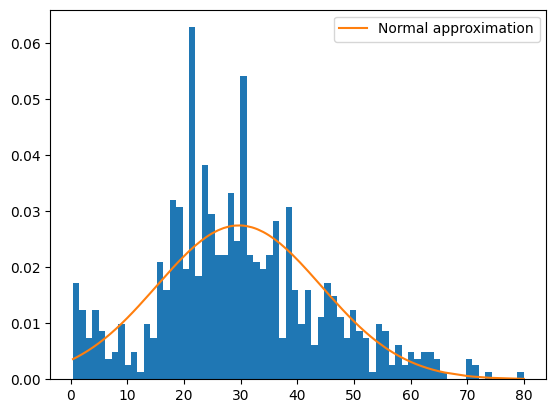

In [34]:
basichist(df_titanic,'Age',70,pdf=True)

Syntax of "basicscatter" is basicscatter(name of the dataframe, independent variable, dependent variable, ols = True to show ordinal least square line of the dataset).
    This should be used with continuous variables.

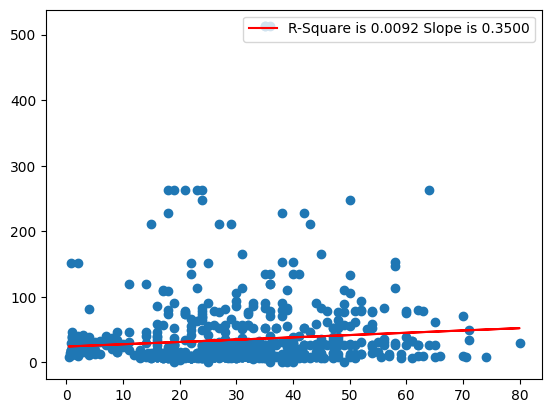

In [25]:
basicscatter(df_titanic,'Age','Fare',ols=True)

Syntax of "compareboxplot" is compareboxplot(name of the dataframe, categorical variable, continuous variable).
    This should be used to compare continuous variable in different categorical groups.

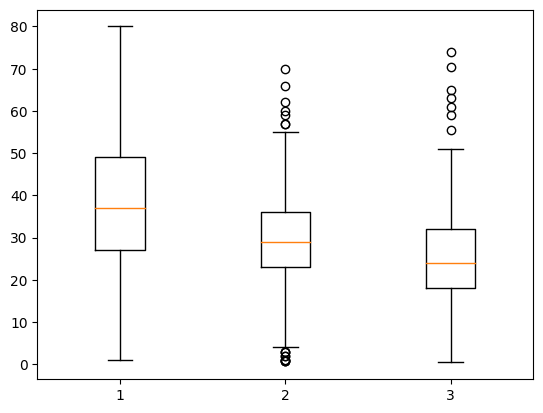

In [26]:
compareboxplot(df_titanic,'Pclass','Age')

Syntax of "tabulatebarplot" is tabulatebarplot(name of the dataframe, first categorical variable, second categorical variable).
    This is a visualized contingency table of 2 categorical variables. 

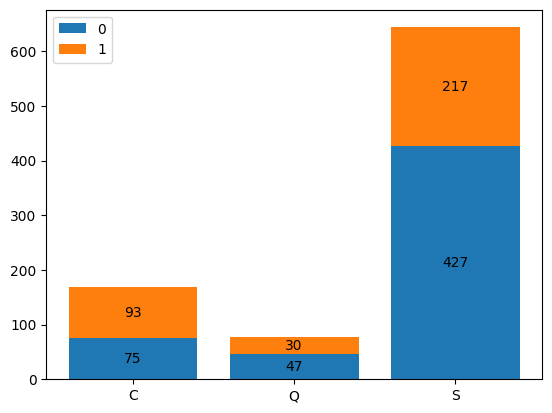

In [27]:
tabulatebarplot(df_titanic,'Embarked','Survived')

Syntax of "matrixtabplot" is matrixtabplot(name of the dataframe, first categorical variable, second categorical variable).
    This is a visualized contingency table of 2 categorical variables in 3D. 

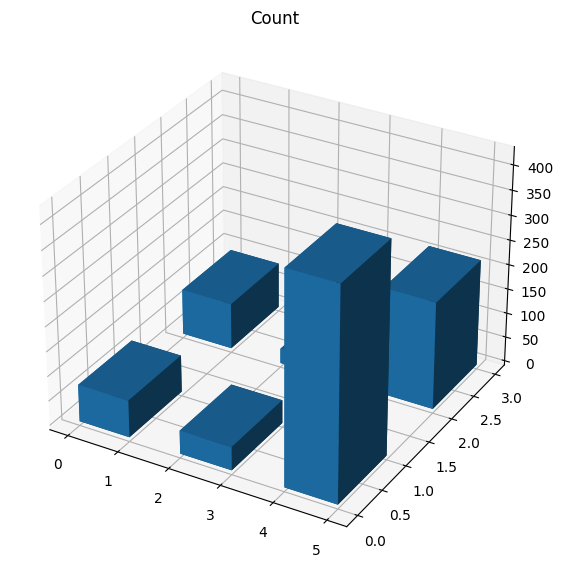

In [37]:
matrixtabplot(df_titanic,'Embarked','Survived')